In [2]:
import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
train_scaled = train_input / 255.0

from sklearn.model_selection import train_test_split

train_scaled, val_input, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [4]:
# Flatten() 층 : 다차원 배열 입력 => 1차원 배열 입력

model = keras.Sequential()
model.add(keras.layers.Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

#### 옵티마이저 : 손실값으로 가중치와 절편을 조정, 다시 학습(배치 단위) : 역전파(Back Propagation)
- 기본 경사하강법 옵티마이저
    - SGD
        - 모멘텀 최적화
        - 네스테로프 경사 가속
        
- 적응적 학습률 경사하강법 옵티마이저
    - AdaGrad 
    - RMSprop

- 적응적 학습률 + 모멘텀 최적화
    - Adam

- learning rate : 기본값 :0.1

In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8930 - loss: 0.2975
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8960 - loss: 0.2935
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8989 - loss: 0.2822
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9021 - loss: 0.2776
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9073 - loss: 0.2692


In [10]:
history.history

{'accuracy': [0.8917499780654907,
  0.8956249952316284,
  0.8975625038146973,
  0.9010208249092102,
  0.9050833582878113],
 'loss': [0.30486494302749634,
  0.2957199215888977,
  0.28787165880203247,
  0.2789596617221832,
  0.27195459604263306]}

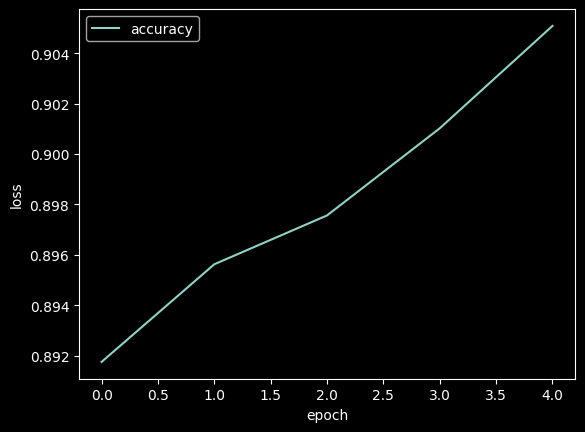

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'accuracy')
#plt.plot(history.history['loss'], label = '손실값')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [25]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [26]:
# Adam 옵티마이저 적용
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# learnin_rate 적용
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
hist = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6386 - loss: 1.1015
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8241 - loss: 0.5294
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8438 - loss: 0.4640
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8544 - loss: 0.4316
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8591 - loss: 0.4143


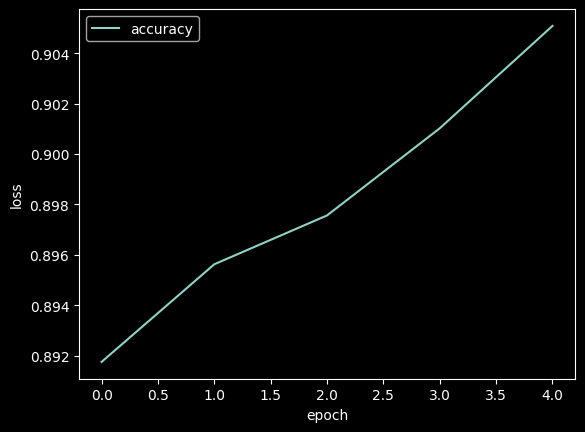

In [29]:
plt.plot(history.history['accuracy'], label = 'accuracy')
#plt.plot(history.history['loss'], label = '손실값')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()